# The objective is to apply the Random Walk Metropolis (RWM) algorithm to generate samples from the Laplace distribution.

# Part 1(a): Random Walk Metropolis Sampling

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Creating function

In [2]:
def f (x):
    return 0.5*np.exp(-abs(x))

# Initializing values

In [3]:
N=10000
s=1
x0=0

# Simulating a random number x∗ from the Normal distribution with mean xi−1 and std deviation s

In [5]:
samples=np.zeros(N)
samples[0]=x0

for i in range(1,N):
    
    x_star=np.random.normal(samples[i-1],s)
    log_r=(np.log(0.5)-abs(x_star))-(np.log(0.5)-abs(samples[i-1]))
    log_u=np.log(np.random.rand())
    #r=f(x_star)/f(samples[i-1])
    #u=np.random.rand()
    if log_u<log_r:
        samples[i]=x_star
    else:        
        samples[i]=samples[i-1]
        

# Constructing a histogram and a kernel density plot

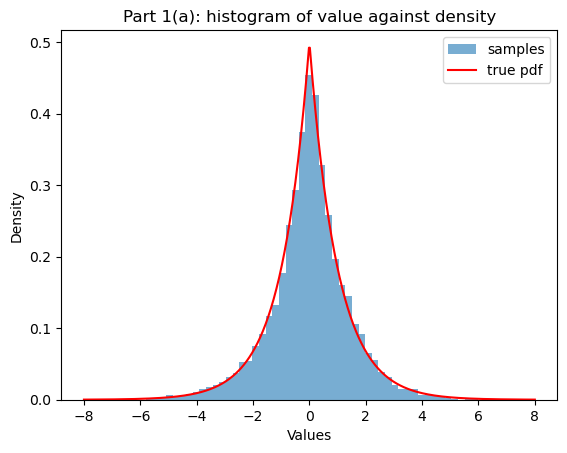

In [7]:
plt.hist(samples,bins=50,density=True,alpha=0.6,label='samples')
x=np.linspace(-8,8,500)
plt.plot(x,f(x),'r',label='true pdf')
plt.legend()
plt.title('Part 1(a): histogram of value against density')
plt.xlabel('Values')
plt.ylabel('Density')
plt.show()

# Sample mean and std deviation of the generated samples

In [8]:
print('sample mean:',np.mean(samples))
print('sample std deviation:',np.std(samples))

sample mean: 0.002451604824792548
sample std deviation: 1.3786909140899515


# Part 1(b): convergence diagnostics(R-hat)

# Initializing values

In [9]:
n=2000
J=4
initial_values=[-4,-1,1,4]
np.random.seed(1)
s_values=np.linspace(0.001,1,40)


# Generating chains and computing values of Mj,Vj,W,M,B and R-hat

In [10]:
Rhat_list=[]
for s in s_values:
    chains=[]
    for j in range(J):
        x=np.zeros(N)
        x[0]=initial_values[j]

        for i in range(1,N):
            x_star=np.random.normal(x[i-1],s)
            log_r=(np.log(0.5)-abs(x_star))-(np.log(0.5)-abs(x[i-1]))
            log_u=np.log(np.random.rand())
            if log_u<log_r:
                x[i]=x_star
            else:
                x[i]=x[i-1]
        chains.append(x[1:])
    chains=np.array(chains)
    
    Mj=np.mean(chains,axis=1)

    Vj=np.mean((chains-Mj[:,None])**2,axis=1)

    W=np.mean(Vj)

    M=np.mean(Mj)

    B=np.mean((Mj-M)**2)

    Rhat=np.sqrt((B+W)/W)
    Rhat_list.append(Rhat)

Rhat_list=np.array(Rhat_list)    

# Plotting R-hat vs std deviation

C:\Users\Matthew Lean\AppData\Local\Temp\ipykernel_29476\4044400887.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


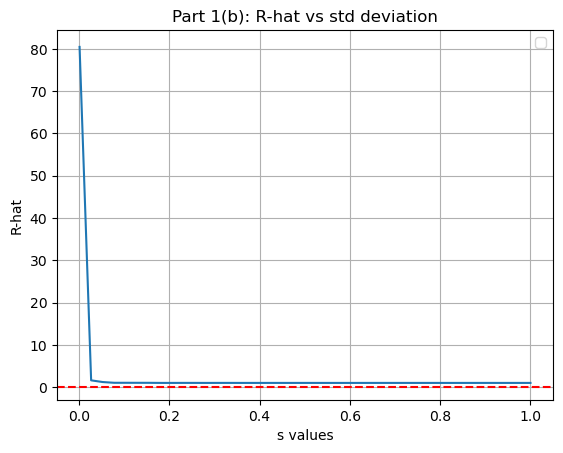

In [14]:
plt.plot(s_values,Rhat_list)
plt.axhline(color='red',linestyle='--')
plt.xlabel('s values')
plt.ylabel('R-hat')
plt.title('Part 1(b): R-hat vs std deviation')
plt.legend()
plt.grid(True)
plt.show()